In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scanpy.api as sc
from igraph import *
from MulticoreTSNE import MulticoreTSNE as TSNE #faster TSNE alternative
from anndata import read_h5ad
from anndata import read_csv
sc.logging.print_versions()

scanpy==1.4.3+60.gb3dc34a anndata==0.6.22rc1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
pwd

'/home/ubuntu/maca-data-analysis/sapiens'

# Read raw gene count table

In [3]:
adata = read_csv('./190627_A00111_0335_BHLMG5DSXX.csv')
adata = adata.transpose()
adata

AnnData object with n_obs × n_vars = 7301 × 26582 

In [4]:
adata.var_names

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3', '__no_feature',
       '__ambiguous', '__too_low_aQual', '__not_aligned',
       '__alignment_not_unique'],
      dtype='object', length=26582)

In [5]:
adata.obs

""
B107809_A10_S130.homo
B107809_A11_S131.homo
B107809_A12_S132.homo
B107809_A13_S133.homo
B107809_A14_S134.homo
B107809_A15_S135.homo
B107809_A16_S136.homo
B107809_A17_S137.homo
B107809_A18_S138.homo
B107809_A19_S139.homo


In [6]:
adata, adata.obs

(AnnData object with n_obs × n_vars = 7301 × 26582 , Empty DataFrame
 Columns: []
 Index: [B107809_A10_S130.homo, B107809_A11_S131.homo, B107809_A12_S132.homo, B107809_A13_S133.homo, B107809_A14_S134.homo, B107809_A15_S135.homo, B107809_A16_S136.homo, B107809_A17_S137.homo, B107809_A18_S138.homo, B107809_A19_S139.homo, B107809_A1_S121.homo, B107809_A20_S140.homo, B107809_A21_S141.homo, B107809_A22_S142.homo, B107809_A23_S143.homo, B107809_A2_S122.homo, B107809_A3_S123.homo, B107809_A4_S124.homo, B107809_A5_S125.homo, B107809_A6_S126.homo, B107809_A7_S127.homo, B107809_A8_S128.homo, B107809_A9_S129.homo, B107809_B10_S153.homo, B107809_B11_S154.homo, B107809_B12_S155.homo, B107809_B13_S156.homo, B107809_B14_S157.homo, B107809_B15_S158.homo, B107809_B16_S159.homo, B107809_B17_S160.homo, B107809_B18_S161.homo, B107809_B19_S162.homo, B107809_B1_S144.homo, B107809_B20_S163.homo, B107809_B21_S164.homo, B107809_B22_S165.homo, B107809_B23_S166.homo, B107809_B2_S145.homo, B107809_B3_S146.homo, B

In [7]:
adata.obs['plate'] = [c.split('_')[0] for c in adata.obs.index]
adata = adata[adata.obs['plate']!='KTRareCell']
adata

View of AnnData object with n_obs × n_vars = 7278 × 26582 
    obs: 'plate'

In [8]:
adata.X

ArrayView([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 2.248000e+03],
           [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 4.478000e+03],
           [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 5.234000e+03],
           ...,
           [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 7.013000e+03],
           [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 1.677992e+06],
           [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
            0.000000e+00, 2.763495e+06]], dtype=float32)

In [9]:
adata.obs

,plate
B107809_A10_S130.homo,B107809
B107809_A11_S131.homo,B107809
B107809_A12_S132.homo,B107809
B107809_A13_S133.homo,B107809
B107809_A14_S134.homo,B107809
B107809_A15_S135.homo,B107809
B107809_A16_S136.homo,B107809
B107809_A17_S137.homo,B107809
B107809_A18_S138.homo,B107809
B107809_A19_S139.homo,B107809


In [10]:
adata.obs['well'] = [c.split('_')[1] for c in adata.obs.index]
adata.obs.head()

Trying to set attribute `.obs` of view, making a copy.


,plate,well
B107809_A10_S130.homo,B107809,A10
B107809_A11_S131.homo,B107809,A11
B107809_A12_S132.homo,B107809,A12
B107809_A13_S133.homo,B107809,A13
B107809_A14_S134.homo,B107809,A14


# Read metadata

In [11]:
metadata = pd.read_csv('./TS_Pilot_Plate Info_071019 - Sheet1.csv')
metadata = metadata[~metadata.NovaSeqRun.isna()]
metadata

,CellID,cDNAPlate,LibraryPlateID,Tissue,PrimarySort,AnatomicalPosition,SortOrder,Wells,Excluded,SortDirection,Investigator,Barcode,cDNA Prep,cDNA Dilute,library prep,lib prep date,bead cleanup,BA nM,NovaSeqRun,Additional Notes
0,NaN,B107813,B107813Blue,Lung,Epithelial,Proximal,Plate 1,A1-P12,Col24,Column,Krasnow,BC8,Bob,Roja,Bob,6-6-19,Sheela,20.2,TSPSS1Run1,NaN
1,NaN,B107813,B107813Blue,Lung,Endothelial,Proximal,Plate 1,A13-P23,Col24,Column,Krasnow,BC8,Bob,NaN,Bob,6-6-19,NaN,20.2,TSPSS1Run1,NaN
2,NaN,B107810,B107810Blue,Lung,Immune,Proximal,Plate 2,A1-P12,Col24,Column,Krasnow,BC6,Bob,NaN,Roja,6-6-19,Roja,11.8,TSPSS1Run1,NaN
3,NaN,B107810,B107810Blue,Lung,Stromal,Proximal,Plate 2,A13-P23,Col24,Column,Krasnow,BC8,Bob,NaN,Roja,6-6-19,NaN,11.8,TSPSS1Run1,NaN
4,NaN,B107809,B107809Blue,Lung,Epithelial,MedialDistal,Plate 3,A1-P12,Col24,Column,Krasnow,BC5,Bob,Roja,Roja,6-6-19,Roja,12.6,TSPSS1Run1,NaN
5,NaN,B107809,B107809Blue,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
6,NaN,B107811,B107811Blue,Lung,Immune,MedialDistal,Plate 4,A1-P12,Col24,Column,Krasnow,BC7,Bob,NaN,Roja,6-6-19,Roja,14.9,TSPSS1Run1,NaN
7,NaN,B107811,B107811Blue,Lung,Stromal,MedialDistal,Plate 4,A13-P23,Col24,Column,Krasnow,BC7,Bob,NaN,Roja,6-6-19,NaN,14.9,TSPSS1Run1,NaN
8,NaN,B107925,B107925Blue,Blood,LymphocytesNeutrophils,NaN,Plate 1,A1-P23,Col24,Row,Krasnow,BC9,Roja,NaN,Bob,6-6-19,Sheela,20.5,TSPSS1Run1,NaN
9,NaN,B107926,B107926Blue,Blood,LymphocytesNeutrophils,NaN,Plate 2,A1-P23,Col24,Row,Krasnow,BC9,Roja,NaN,Bob,6-6-19,Sheela,17.0,NovaRun36,NaN


In [12]:
import string
wellL_AP = list(string.ascii_uppercase)[0:16]
wellL_AI = list(string.ascii_uppercase)[0:9]
wellN_1_12 = range(1,13)
wellN_13_23 = range(13,24)
wellN_1_23 = range(1,24)
wellN_1_6 = range(1,7)

wells_A1_P12 = []
for l in wellL_AP:
    for n in wellN_1_12:
        wells_A1_P12.append(l+str(n))
wells_A1_P12

wells_A13_P23 = []
for l in wellL_AP:
    for n in wellN_13_23:
        wells_A13_P23.append(l+str(n))
wells_A13_P23

wells_A1_P23 = []
for l in wellL_AP:
    for n in wellN_1_23:
        wells_A1_P23.append(l+str(n))
wells_A1_P23

wells_A1_I6 = []
for l in wellL_AI:
    for n in wellN_1_6:
        wells_A1_I6.append(l+str(n))
wells_A1_I6

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6']

In [13]:
wells_dict = {'A1-I6':wells_A1_I6, 'A1-P12':wells_A1_P12, 'A1-P23':wells_A1_P23, 'A13-P23':wells_A13_P23}
wells_dict

{'A1-I6': ['A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D6',
  'E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'F1',
  'F2',
  'F3',
  'F4',
  'F5',
  'F6',
  'G1',
  'G2',
  'G3',
  'G4',
  'G5',
  'G6',
  'H1',
  'H2',
  'H3',
  'H4',
  'H5',
  'H6',
  'I1',
  'I2',
  'I3',
  'I4',
  'I5',
  'I6'],
 'A1-P12': ['A1',
  'A2',
  'A3',
  'A4',
  'A5',
  'A6',
  'A7',
  'A8',
  'A9',
  'A10',
  'A11',
  'A12',
  'B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B8',
  'B9',
  'B10',
  'B11',
  'B12',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D6',
  'D7',
  'D8',
  'D9',
  'D10',
  'D11',
  'D12',
  'E1',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9',
  'E10',
  'E11',
  'E12',
  'F1',
  'F2',
  'F3',
  'F4',
  'F5',
  'F6',
  'F7

In [14]:
adata = adata[:,adata.var_names[0:-5]]

In [15]:
ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
ercc_genes

Index(['ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012',
       'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019',
       'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031',
       'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040',
       'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046',
       'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057',
       'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062',
       'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074',
       'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079',
       'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086',
       'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098',
       'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111',
       'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00120',

# Add metadata to counts

In [16]:
adata.obs['tissue'] = ''
adata.obs['primary_sort'] = ''
adata.obs['anatomical_position'] = ''
adata.obs['sort_order'] = ''
adata.obs['well_group'] = ''
adata.obs['excluded'] = ''
adata.obs['sort_direction'] = ''
adata.obs['investigator'] = ''
adata.obs['barcode'] = ''
adata.obs['cDNA_prep_person'] = ''
adata.obs['cDNA_dilute'] = ''
adata.obs['library_prep'] = ''
adata.obs['lib_prep_date'] = ''
adata.obs['bead_cleanup'] = ''
adata.obs['BA_nM'] = ''
adata.obs['NovaSeqRun'] = ''
adata.obs['additional_notes'] = ''

for c in adata.obs.index:
    p = adata.obs.loc[c,'plate']
    metadata_subset = metadata[metadata['cDNAPlate']==p]
    w = adata.obs.loc[c,'well']
    well_range = list(set(metadata_subset['Wells']))
    for wi in well_range:
        if w in wells_dict[wi]:    
            metadata_to_use = metadata_subset[metadata_subset['Wells']==wi]
        
#     if len(well_range)>1:
#         print('Error: inconsistent metadata')
#     else:
#         well_range = well_range[0]
        
    adata.obs.loc[c,'tissue'] = metadata_to_use['Tissue'].values[0]
    adata.obs.loc[c,'primary_sort'] = metadata_to_use['PrimarySort'].values[0]
    adata.obs.loc[c,'anatomical_position'] = metadata_to_use['AnatomicalPosition'].values[0]
    adata.obs.loc[c,'sort_order'] = metadata_to_use['SortOrder'].values[0]
    adata.obs.loc[c,'well_group'] = metadata_to_use['Wells'].values[0]
    adata.obs.loc[c,'excluded'] = metadata_to_use['Excluded'].values[0]
    adata.obs.loc[c,'sort_direction'] = metadata_to_use['SortDirection'].values[0]
    adata.obs.loc[c,'investigator'] = metadata_to_use['Investigator'].values[0]
    adata.obs.loc[c,'barcode'] = metadata_to_use['Barcode'].values[0]
    adata.obs.loc[c,'cDNA_prep_person'] = metadata_to_use['cDNA Prep'].values[0]
    adata.obs.loc[c,'cDNA_dilute'] = metadata_to_use['cDNA Dilute'].values[0]
    adata.obs.loc[c,'library_prep'] = metadata_to_use['library prep'].values[0]
    adata.obs.loc[c,'lib_prep_date'] = metadata_to_use['lib prep date'].values[0]
    adata.obs.loc[c,'bead_cleanup'] = metadata_to_use['bead cleanup'].values[0]
    adata.obs.loc[c,'BA_nM'] = metadata_to_use['BA nM'].values[0]
    adata.obs.loc[c,'NovaSeqRun'] = metadata_to_use['NovaSeqRun'].values[0]
    adata.obs.loc[c,'additional_notes'] = metadata_to_use['Additional Notes'].values[0]
    

Trying to set attribute `.obs` of view, making a copy.


In [17]:
adata.obs.head(10)

,plate,well,tissue,primary_sort,anatomical_position,sort_order,well_group,excluded,sort_direction,investigator,barcode,cDNA_prep_person,cDNA_dilute,library_prep,lib_prep_date,bead_cleanup,BA_nM,NovaSeqRun,additional_notes
B107809_A10_S130.homo,B107809,A10,Lung,Epithelial,MedialDistal,Plate 3,A1-P12,Col24,Column,Krasnow,BC5,Bob,Roja,Roja,6-6-19,Roja,12.6,TSPSS1Run1,NaN
B107809_A11_S131.homo,B107809,A11,Lung,Epithelial,MedialDistal,Plate 3,A1-P12,Col24,Column,Krasnow,BC5,Bob,Roja,Roja,6-6-19,Roja,12.6,TSPSS1Run1,NaN
B107809_A12_S132.homo,B107809,A12,Lung,Epithelial,MedialDistal,Plate 3,A1-P12,Col24,Column,Krasnow,BC5,Bob,Roja,Roja,6-6-19,Roja,12.6,TSPSS1Run1,NaN
B107809_A13_S133.homo,B107809,A13,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A14_S134.homo,B107809,A14,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A15_S135.homo,B107809,A15,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A16_S136.homo,B107809,A16,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A17_S137.homo,B107809,A17,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A18_S138.homo,B107809,A18,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN
B107809_A19_S139.homo,B107809,A19,Lung,Endothelial,MedialDistal,Plate 3,A13-P23,Col24,Column,Krasnow,BC5,Bob,NaN,Roja,6-6-19,NaN,12.6,TSPSS1Run1,NaN


In [18]:
adata

AnnData object with n_obs × n_vars = 7278 × 26577 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes'

In [19]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-raw.h5ad')

... storing 'plate' as categorical
... storing 'well' as categorical
... storing 'tissue' as categorical
... storing 'primary_sort' as categorical
... storing 'anatomical_position' as categorical
... storing 'sort_order' as categorical
... storing 'well_group' as categorical
... storing 'excluded' as categorical
... storing 'sort_direction' as categorical
... storing 'investigator' as categorical
... storing 'barcode' as categorical
... storing 'cDNA_prep_person' as categorical
... storing 'cDNA_dilute' as categorical
... storing 'library_prep' as categorical
... storing 'lib_prep_date' as categorical
... storing 'bead_cleanup' as categorical
... storing 'BA_nM' as categorical
... storing 'NovaSeqRun' as categorical
... storing 'additional_notes' as categorical


# Data basic filtering

In [20]:
adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-raw.h5ad')

In [21]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 4084 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [22]:
adata.write('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered.h5ad')

# Data analysis

In [23]:
adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered.h5ad')

In [24]:
set(adata.obs['tissue'])

{'Bladder', 'Blood', 'Lung', 'Muscle', 'PancreasEndocrine', 'PancreasExocrine'}

In [25]:
adata.obs['n_counts'] = adata.X.sum(axis=1)#.A1

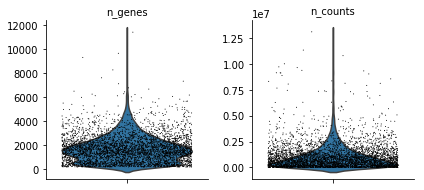

In [26]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],jitter=0.4, multi_panel=True)

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


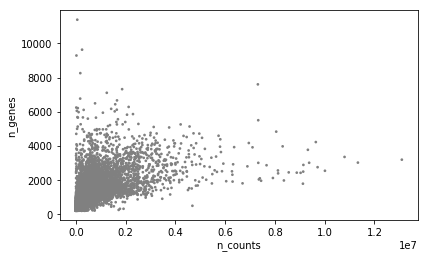

In [27]:
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [28]:
# adata = adata[adata.obs['n_genes'] < 5000, :]

In [29]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [30]:
sc.pp.log1p(adata)

In [31]:
adata.raw = adata

In [32]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

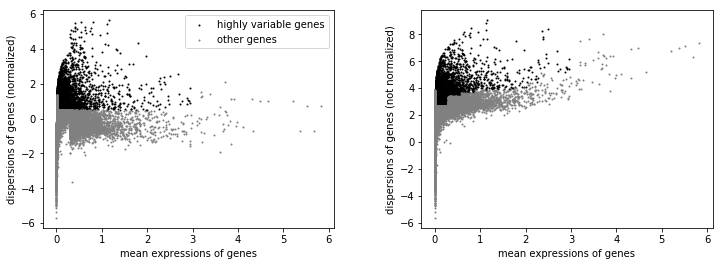

In [33]:
sc.pl.highly_variable_genes(adata)

In [34]:
sc.pp.scale(adata, max_value=10)

In [35]:
sc.tl.pca(adata, svd_solver='arpack')

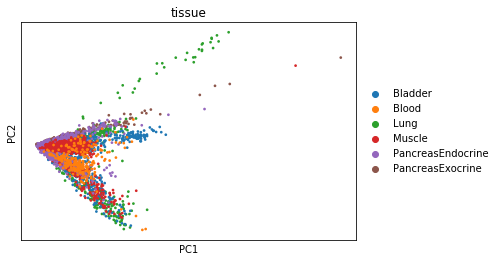

In [36]:
sc.pl.pca(adata, color='tissue')

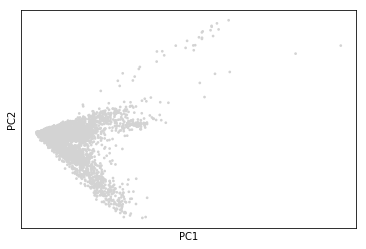

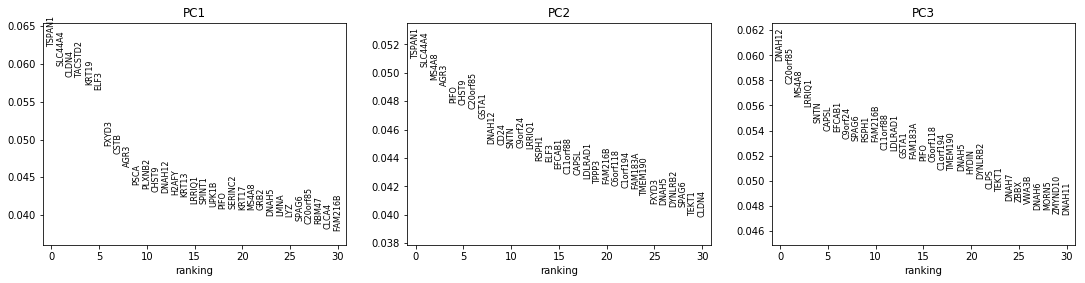

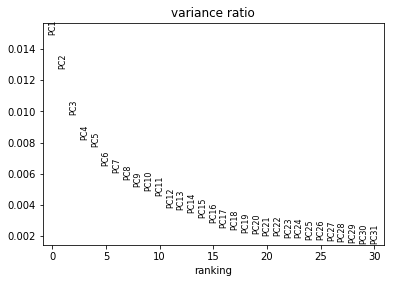

In [37]:
sc.pl.pca_overview(adata)

In [38]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=12)

In [39]:
sc.tl.umap(adata)

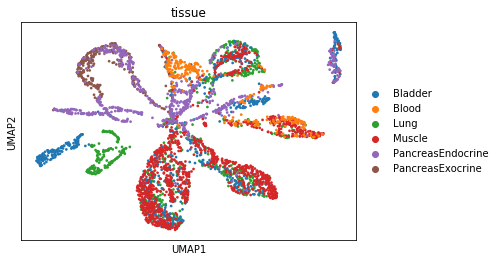

In [40]:
sc.pl.umap(adata, color=['tissue'])

In [41]:
set(adata.obs['tissue'])

{'Bladder', 'Blood', 'Lung', 'Muscle', 'PancreasEndocrine', 'PancreasExocrine'}

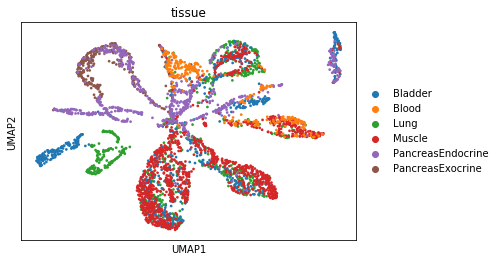

In [42]:
sc.pl.umap(adata, color=['tissue'],use_raw=False)

In [43]:
adata.obs.columns

Index(['plate', 'well', 'tissue', 'primary_sort', 'anatomical_position',
       'sort_order', 'well_group', 'excluded', 'sort_direction',
       'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute',
       'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun',
       'additional_notes', 'n_genes', 'n_counts'],
      dtype='object')

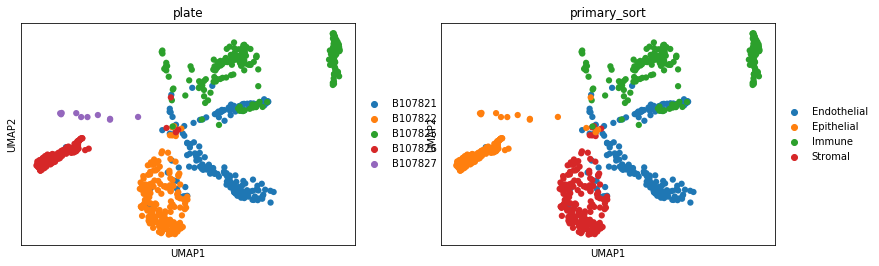

In [44]:
sc.pl.umap(adata[adata.obs['tissue']=='Bladder'], color=['plate','primary_sort'])

In [45]:
sc.tl.louvain(adata)

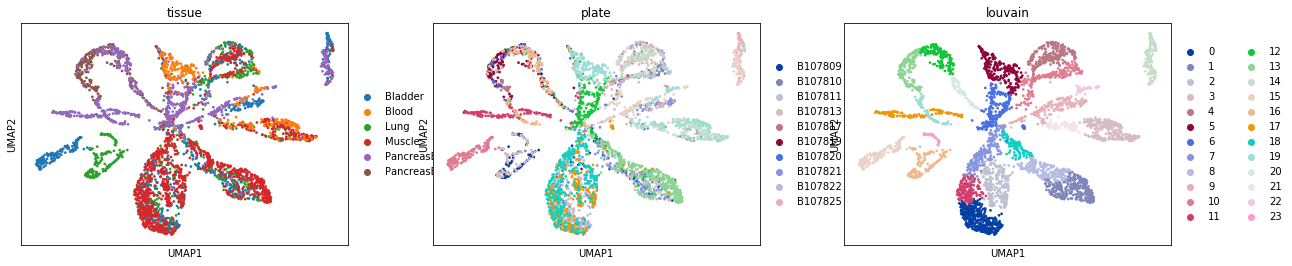

In [46]:
sc.pl.umap(adata, color=['tissue','plate','louvain'])

In [47]:
sc.tl.rank_genes_groups(adata, 'tissue', method='wilcoxon')

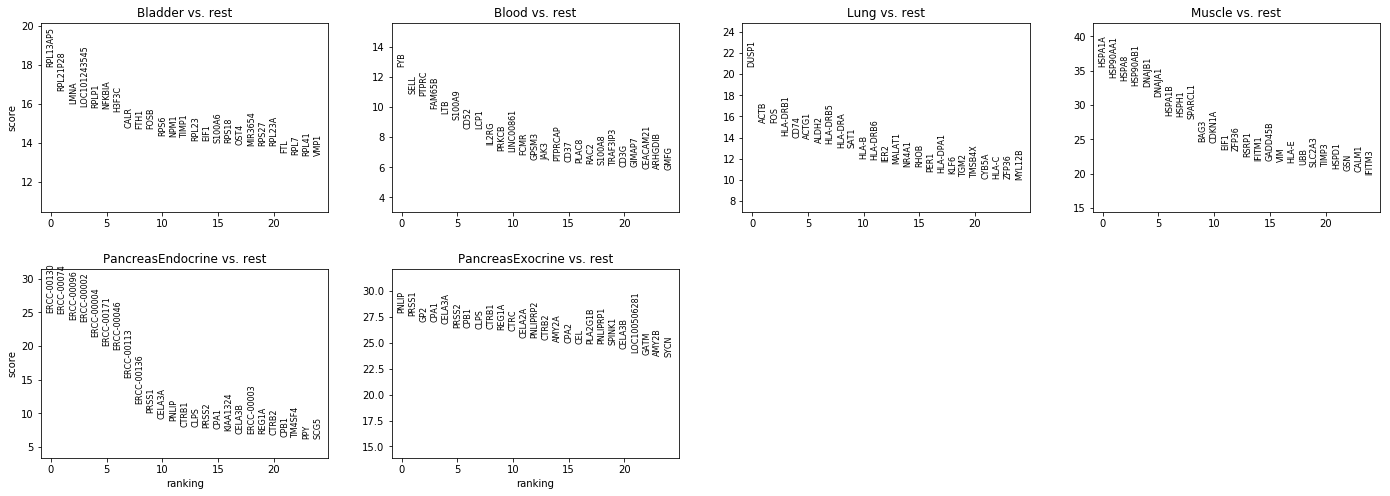

In [48]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [49]:
sapiens_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
sapiens_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-global-rank-genes.csv')
sapiens_rank_genes.head(15)

,Bladder,Blood,Lung,Muscle,PancreasEndocrine,PancreasExocrine
0,RPL13AP5,FYB,DUSP1,HSPA1A,ERCC-00130,PNLIP
1,RPL21P28,SELL,ACTB,HSP90AA1,ERCC-00074,PRSS1
2,LMNA,PTPRC,FOS,HSPA8,ERCC-00096,GP2
3,LOC101243545,FAM65B,HLA-DRB1,HSP90AB1,ERCC-00002,CPA1
4,RPLP1,LTB,CD74,DNAJB1,ERCC-00004,CELA3A
5,NFKBIA,S100A9,ACTG1,DNAJA1,ERCC-00171,PRSS2
6,H3F3C,CD52,ALDH2,HSPA1B,ERCC-00046,CPB1
7,CALR,LCP1,HLA-DRB5,HSPH1,ERCC-00113,CLPS
8,FTH1,IL2RG,HLA-DRA,SPARCL1,ERCC-00136,CTRB1
9,FOSB,PRKCB,SAT1,BAG3,PRSS1,REG1A


In [50]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
sapiens_rank_genes_scores = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores','pvals']})
sapiens_rank_genes_scores.to_csv('/maca-bulk/sapiens/tabula-sapiens-10X-pilot-filtered-global-rank-genes-scores.csv')
sapiens_rank_genes_scores.head(25)

,Bladder_n,Bladder_s,Bladder_p,Blood_n,Blood_s,Blood_p,Lung_n,Lung_s,Lung_p,Muscle_n,Muscle_s,Muscle_p,PancreasEndocrine_n,PancreasEndocrine_s,PancreasEndocrine_p,PancreasExocrine_n,PancreasExocrine_s,PancreasExocrine_p
0,RPL13AP5,17.908440,1.013367e-71,FYB,12.695443,6.267411e-37,DUSP1,20.716673,2.450490e-95,HSPA1A,35.587757,2.166746e-277,ERCC-00130,25.015152,4.182757e-138,PNLIP,27.940804,8.526946e-172
1,RPL21P28,16.685686,1.665829e-62,SELL,10.896092,1.203134e-27,ACTB,15.437249,9.193902e-54,HSP90AA1,34.033875,7.031147e-254,ERCC-00074,24.816095,6.009642e-136,PRSS1,27.644226,3.274525e-168
2,LMNA,16.009209,1.102021e-57,PTPRC,10.738916,6.682423e-27,FOS,15.390609,1.892428e-53,HSPA8,33.597042,1.852994e-247,ERCC-00096,23.988111,3.700583e-127,GP2,27.052254,3.593227e-161
3,LOC101243545,15.863305,1.137462e-56,FAM65B,9.912709,3.665670e-23,HLA-DRB1,14.186474,1.111062e-45,HSP90AB1,32.812477,3.908928e-236,ERCC-00002,23.635502,1.663910e-123,CPA1,27.033762,5.928894e-161
4,RPLP1,15.786386,3.860802e-56,LTB,9.548269,1.318814e-21,CD74,13.962523,2.639238e-44,DNAJB1,32.681366,2.873483e-234,ERCC-00004,21.447975,4.769737e-102,CELA3A,26.881132,3.650223e-159
5,NFKBIA,15.754313,6.415344e-56,S100A9,9.162717,5.060704e-20,ACTG1,13.941445,3.546830e-44,DNAJA1,31.169838,2.731820e-213,ERCC-00171,20.034546,2.753408e-89,PRSS2,26.503925,8.733329e-155
6,H3F3C,15.583098,9.484438e-55,CD52,8.593413,8.442341e-18,ALDH2,13.529220,1.051335e-41,HSPA1B,28.430105,8.586762e-178,ERCC-00046,19.444040,3.273453e-84,CPB1,26.445734,4.085133e-154
7,CALR,14.776542,2.075533e-49,LCP1,8.580957,9.408696e-18,HLA-DRB5,13.422085,4.489046e-41,HSPH1,28.339418,1.130192e-176,ERCC-00113,15.369256,2.631730e-53,CLPS,26.359829,3.959702e-153
8,FTH1,14.726227,4.374598e-49,IL2RG,7.474836,7.730029e-14,HLA-DRA,13.080642,4.248389e-39,SPARCL1,28.027220,7.572104e-173,ERCC-00136,11.393704,4.494639e-30,CTRB1,26.314384,1.312785e-152
9,FOSB,14.710198,5.544442e-49,PRKCB,7.123115,1.055148e-12,SAT1,13.006361,1.125772e-38,BAG3,24.607193,1.057978e-133,PRSS1,10.045990,9.568189e-24,REG1A,26.313671,1.337756e-152


# Generate tissue objects

In [60]:
adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered.h5ad')
print('tissue','total number of cells')
for t in list(set(adata.obs['tissue'])):
    tiss = adata[adata.obs['tissue']==t]
    print(t,len(tiss))
    tiss.write('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-'+t+'.h5ad')

tissue total number of cells
PancreasExocrine 321
Blood 277
PancreasEndocrine 722
Muscle 1272
Lung 730
Bladder 762


Trying to set attribute `.obs` of view, making a copy.


 
 
 
 
 
Now looking at PancreasExocrine!!!
 
make sure data is consistent...
get global view of the tissue


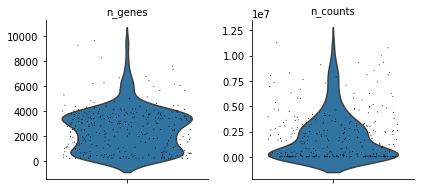

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


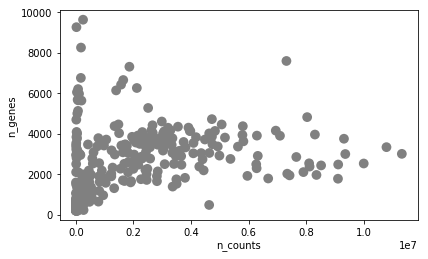

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


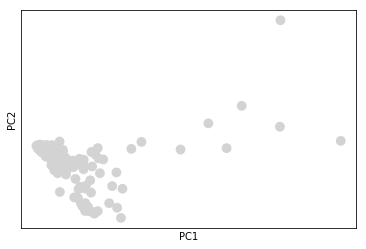

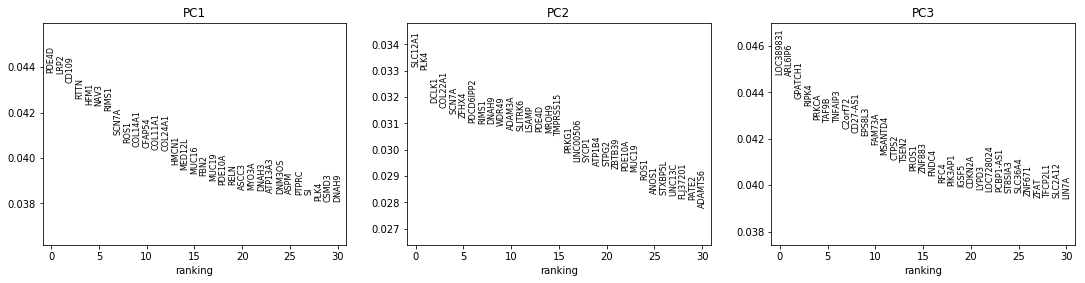

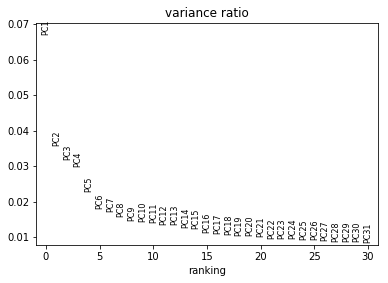

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


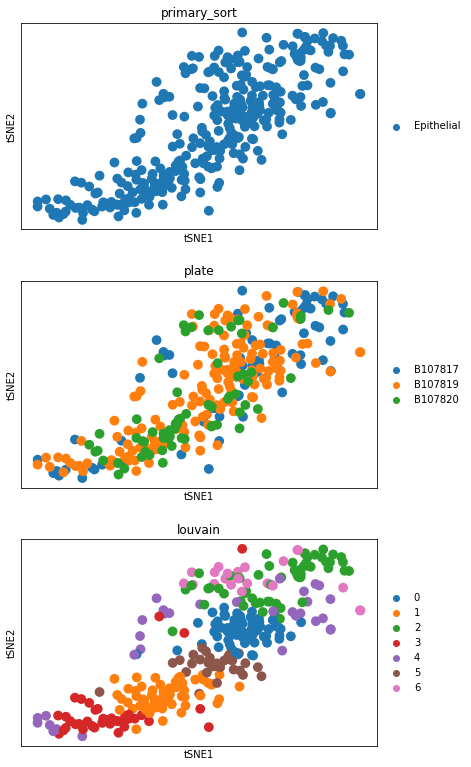

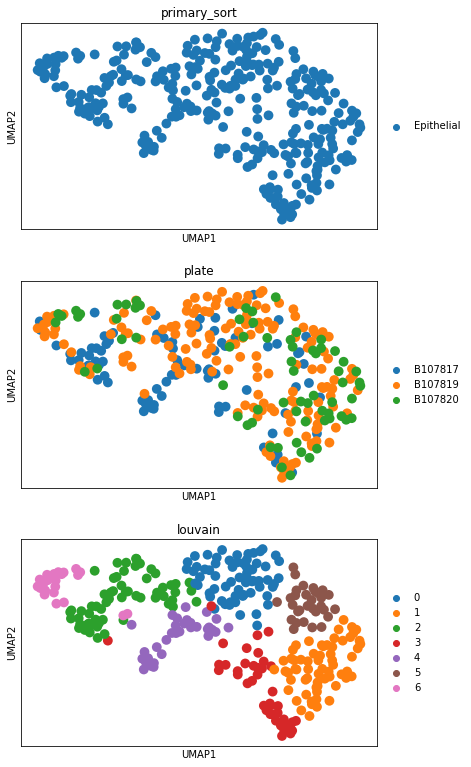

compute tissue rank genes


Trying to set attribute `.obs` of view, making a copy.


        0        1       2          3             4       5       6
0   PNLIP   CELA3A     DST    RNA28S5        MALAT1   RPS14     CLU
1   ERP27     CTRC    CD44   MTRNR2L2  LOC100506281   GPHA2    ACTB
2   AMY2A   CELA3B  SLC4A4    SNORA66         RBPJL  RPL18A   FXYD2
3  TMEM97    CTRB1    CDK6   MTRNR2L8      MTRNR2L1   RPS18  TMSB4X
4    GATM     RPS2   KIF5B    RNA18S5       GOLGA8B    KLK1   GSTP1
5  IGFBP2     KLK1    CFTR   MTRNR2L6      MTRNR2L8    RPL7  ATP1B1
6   MSRB1     SYCN   SYNE2   MTRNR2L1         NEAT1  RPL13A   ITM2B
7     SRM  RARRES2  PTP4A1    MIR6723      PNLIPRP1    CTRC    MYL6
8    CELP    PRSS2  NAP1L1  MTRNR2L10        LUC7L3   RPS19   CALM2
9   EIF4B   CELA2A  ATP1A1    SNORA55      MTRNR2L2     JTB    CD59
 
 
 
 
 
Now looking at Blood!!!
 
make sure data is consistent...
get global view of the tissue


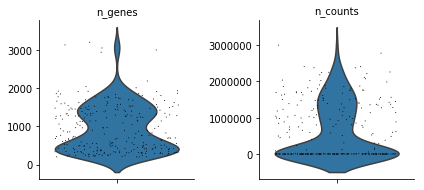

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


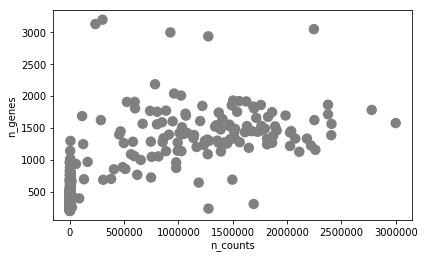

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


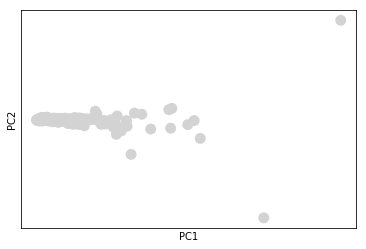

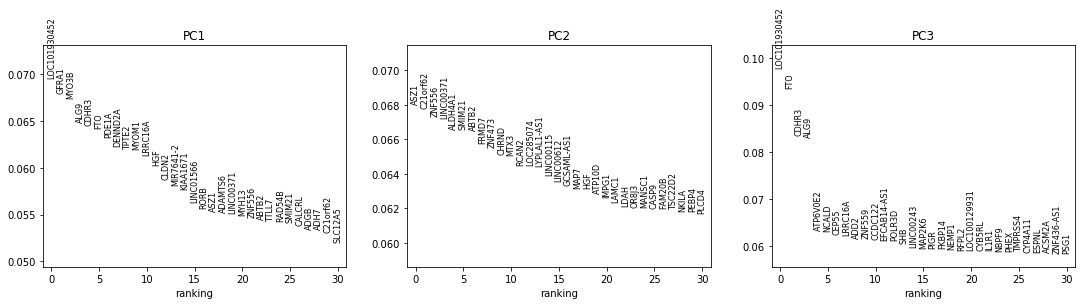

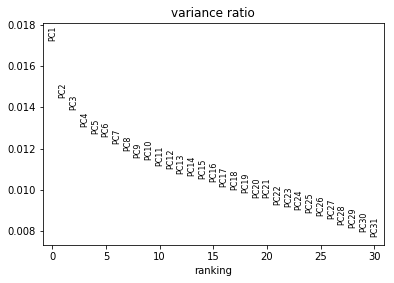

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


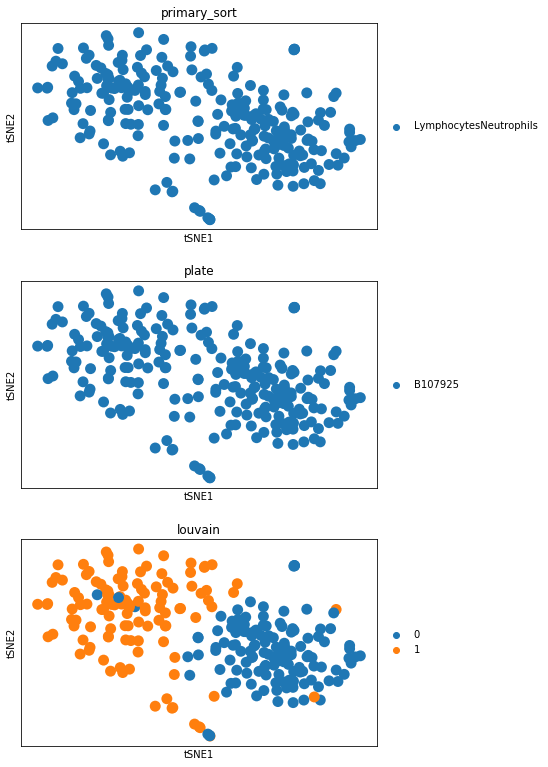

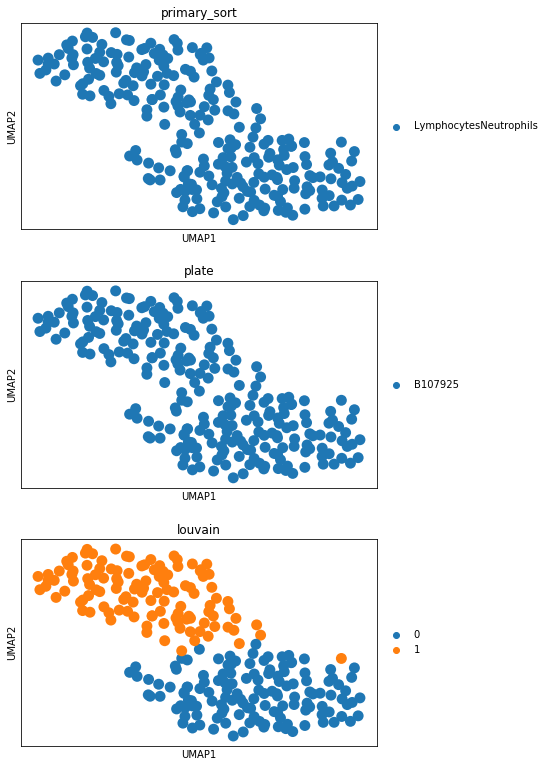

compute tissue rank genes
          0         1
0     RPS27    S100A9
1     RPL15    S100A8
2     RPL21  SERPINA1
3     RPS11     NEAT1
4    RPL13A     CSF3R
5      RPL7    IFITM2
6    RPL23A   S100A12
7      RPS6       FOS
8       B2M    LILRB3
9  RPL13AP5      MNDA
 
 
 
 
 
Now looking at PancreasEndocrine!!!
 


Trying to set attribute `.obs` of view, making a copy.


make sure data is consistent...
get global view of the tissue


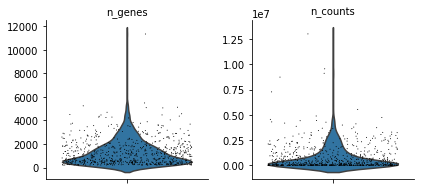

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


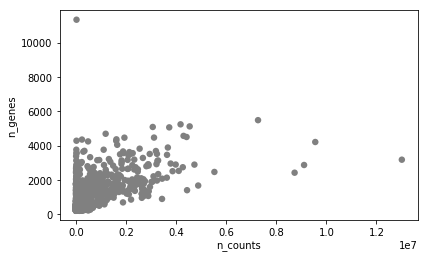

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


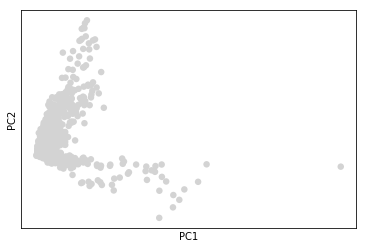

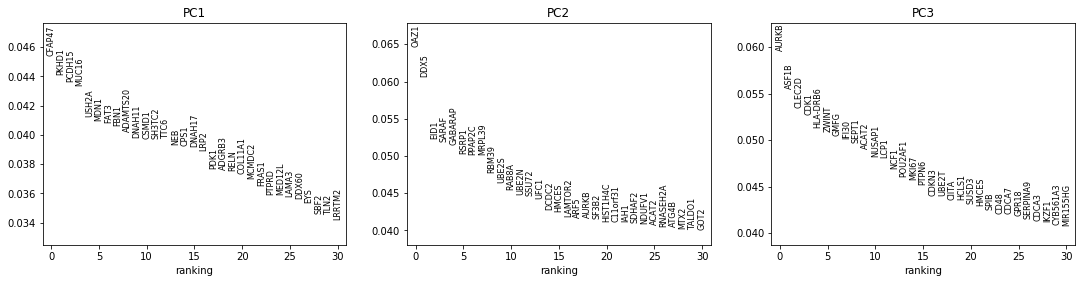

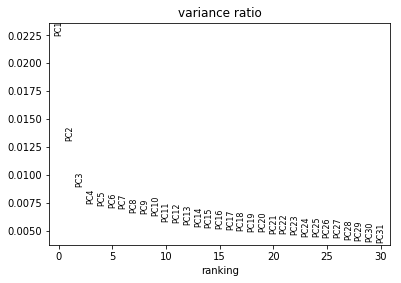

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


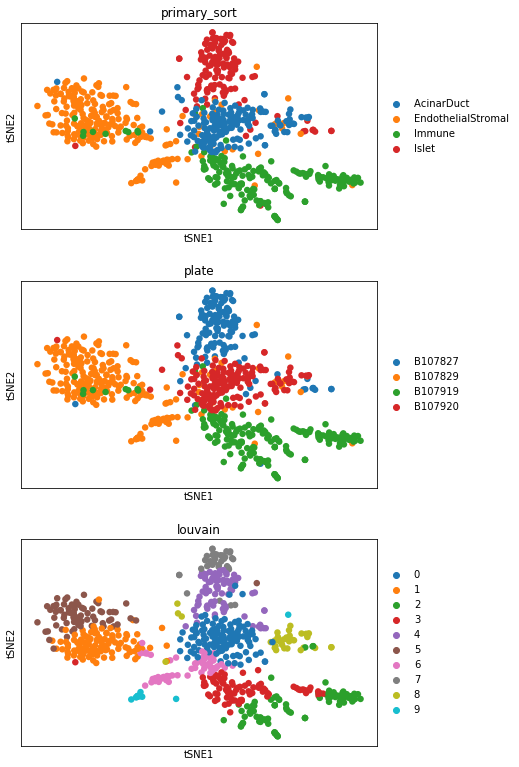

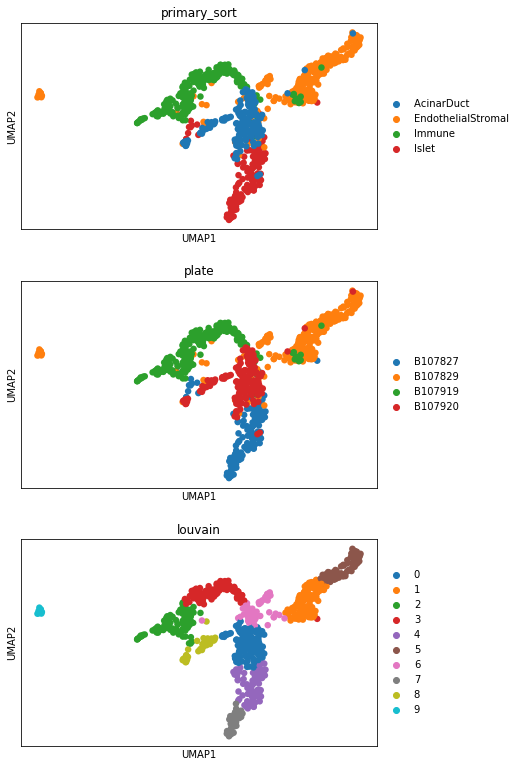

compute tissue rank genes
              0         1         2       3         4      5        6  \
0         PRSS1    S100A9      ACTB   RPS27       CPE    TTN   RNASE1   
1          CLPS     NEAT1   ARHGDIB   RPL41      CHGB  NEAT1    PRSS3   
2        CELA3A     NAMPT    LAPTM5  TMSB4X     ERO1B  HMCN1    PRSS2   
3          CPA1     CSF3R      RPS3   RPLP1       PPY   RYR2    AMY2B   
4      PNLIPRP1       FYB      PTMA   RPS18      SCG5  MUC19     CTRC   
5           GP2  SLC25A37     H3F3B   RPS19      SCG2    NEB  SPARCL1   
6  LOC100506281    S100A8      FTH1   RPL39       TTR  USH2A     CPB1   
7         PRSS2      FPR1      RAC2   RPS29      PAX6   FBN1   CELA2A   
8         PNLIP    IFITM2  SH3BGRL3   RPS11      SCG3  SYNE1   SPINK1   
9      PNLIPRP2     BASP1     RPL19   RPS14  MTRNR2L8  DNAH8      GP2   

         7        8        9  
0   PCSK1N    ANXA2    PLVAP  
1     CHGB  ANXA2P2    RAMP2  
2    ABCC8   CLDN10    SPARC  
3     PAX6     CFTR   ADGRL4  
4  NEUROD1    A

Trying to set attribute `.obs` of view, making a copy.


make sure data is consistent...
get global view of the tissue


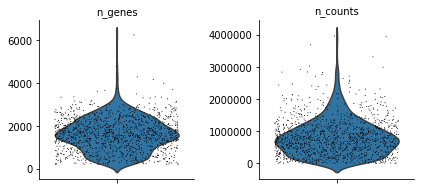

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


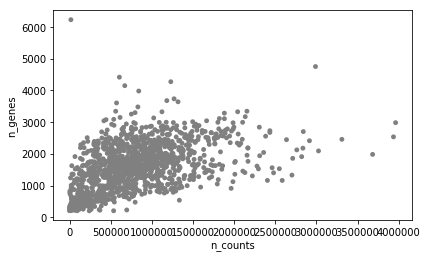

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


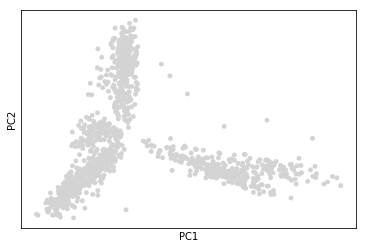

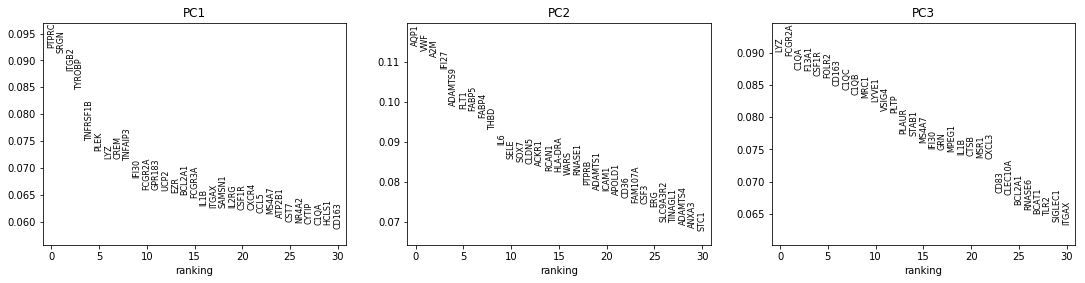

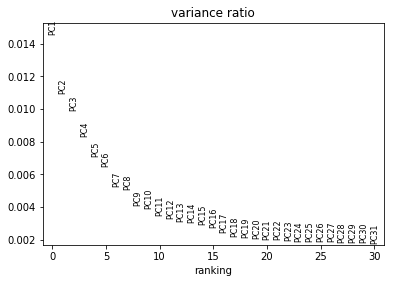

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


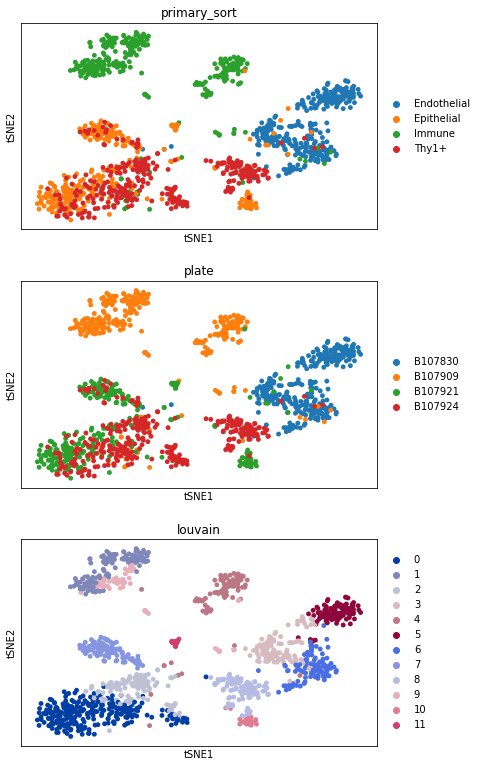

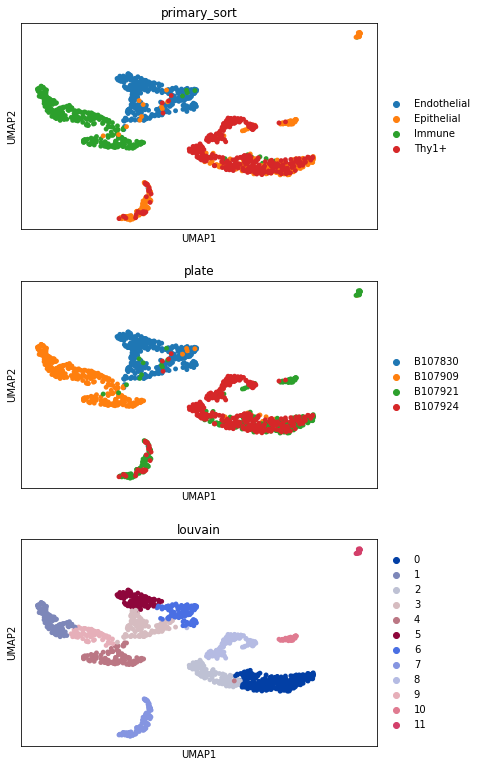

compute tissue rank genes
          0        1         2       3       4       5       6         7  \
0       GSN    PTPRC      APOD     B2M  TYROBP  TM4SF1   FABP4      MEG3   
1       C1R    CXCR4       MGP   IFI27    AIF1    THBD    CD36    CHRNA1   
2       DCN     CCL5       DCN  TMSB10  FCER1G   RAMP3     A2M      DLK1   
3       C1S   STK17B      MYOC  TMSB4X    CTSS    RND1    CDH5     APOC1   
4      GPX3    HLA-A       LUM    CD74     LYZ  PECAM1    WARS      APOE   
5  SERPING1    ARL4C       CFD  TM4SF1    CYBB  PCAT19   BTNL9      MYF5   
6  SERPINF1     LCP1  MTRNR2L8   FABP5   IFI30   ACKR1  ADGRF5      PON2   
7     FBLN1  ARHGDIB     ADH1B     A2M  MS4A6A   PLVAP   FABP5  HSP90AB1   
8      LRP1     CD52    CXCL14   FABP4  FCGR2A  IGFBP4    SDPR      EIF1   
9     PTPRS    HLA-H       C1S     VWF   CSF1R     IL6    ESAM    IGFBP5   

          8        9      10     11  
0    NOTCH3  ARHGDIB   MYH11    CA3  
1    IGFBP7    RPS27   CASQ2  ACTA1  
2      RGS5    PTPRC   

Trying to set attribute `.obs` of view, making a copy.


make sure data is consistent...
get global view of the tissue


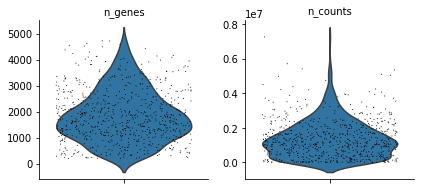

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


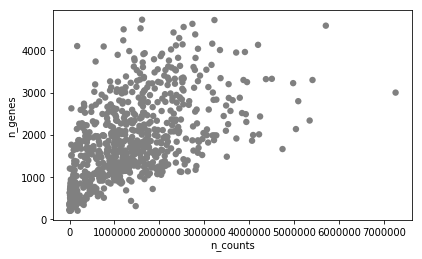

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


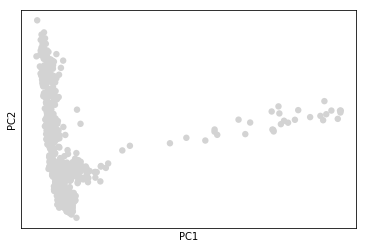

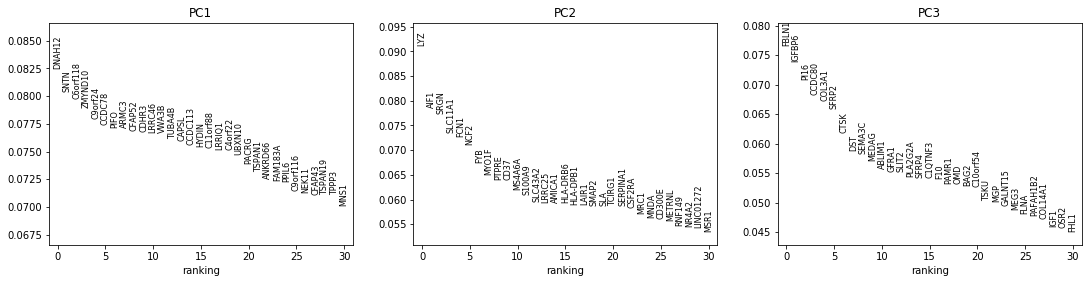

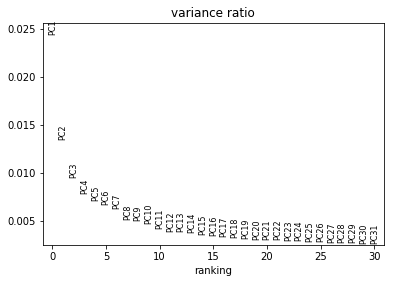

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


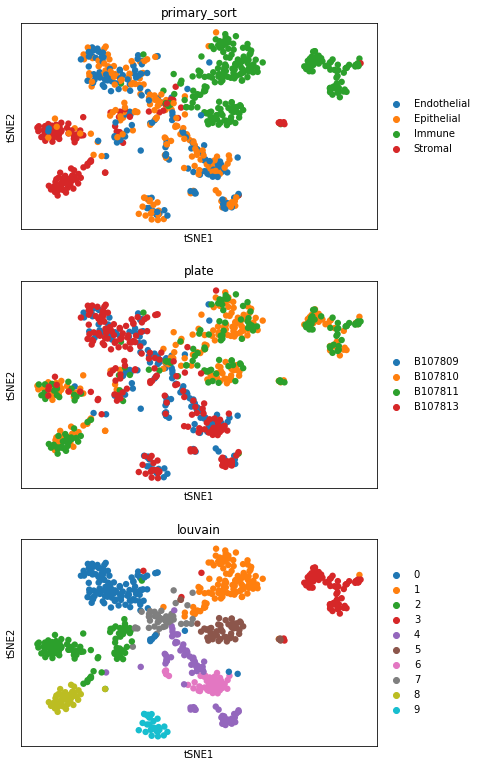

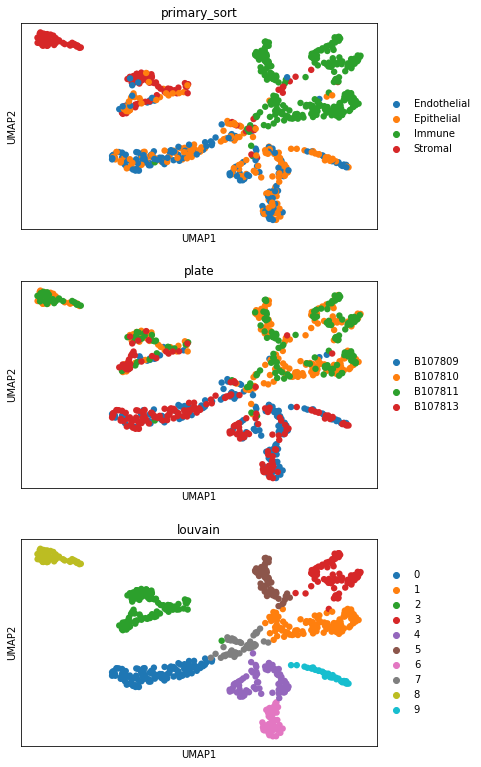

compute tissue rank genes
         0       1         2         3        4        5        6         7  \
0    HLA-E  S100A9      GPX3   HLA-DRA     SLPI    RPS27    NAPSA    MALAT1   
1    EPAS1     LYZ  SERPING1      CD74   CXCL17      B2M  SLC34A2     SCN8A   
2    S1PR1    CTSS       A2M  HLA-DRB1    CYB5A     CD52    SFTPB      RYR3   
3     AQP1  S100A8       DCN  HLA-DQA1     PIGR  ARHGDIB    SFTA3   COL19A1   
4   PECAM1   C5AR1      INMT  HLA-DQB1  SCGB3A1   RPL23A   NKX2-1  MTRNR2L8   
5    IFI27   IFI30     MFAP4  HLA-DPB1    MGST1    CXCR4   DHCR24     FSIP2   
6  TNFSF10  S100A4   SPARCL1  HLA-DRB5   ATP1B1   RPL13A     MALL      RELN   
7    RAMP2  TYROBP     PRELP  HLA-DQB2     ELF3     CCL5     SDC4     FRAS1   
8    CLDN5     FYB   RARRES2    FCGR2A    SFTPB     PFN1    C4BPA     XIRP2   
9     SDPR   COTL1     ADH1B      MRC1    FXYD3  TSC22D3    SUSD2     USH2A   

        8         9  
0   FBLN1  C11orf88  
1  CCDC80  C20orf85  
2   FBLN2     CETN2  
3     DCN   FAM2

Trying to set attribute `.obs` of view, making a copy.


make sure data is consistent...
get global view of the tissue


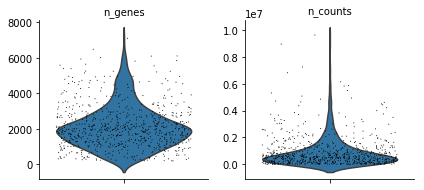

/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:318: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/ubuntu/maca-data-analysis/scanpy/scanpy/plotting/_anndata.py:319: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/ubuntu/anaconda3/lib/python3.7/site-packages/anndata/core/anndata.py:1469: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning


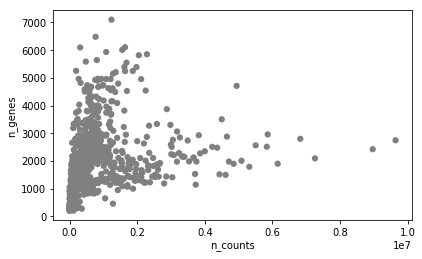

Trying to set attribute `.obs` of view, making a copy.


repeat the basic pre-processing
PCA


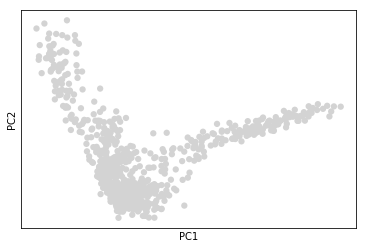

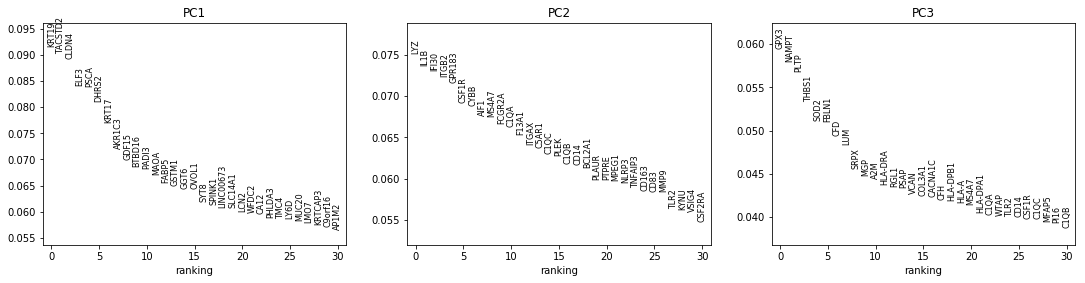

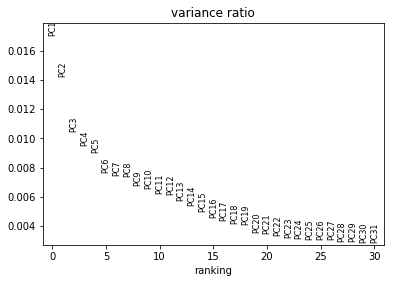

neighbors
visualizations
doing Louvain clustering for quick overview but likely to change this into Leiden
plot


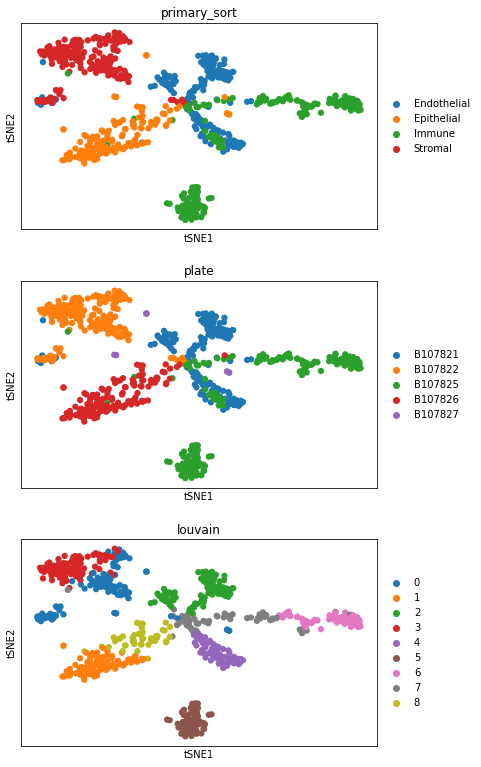

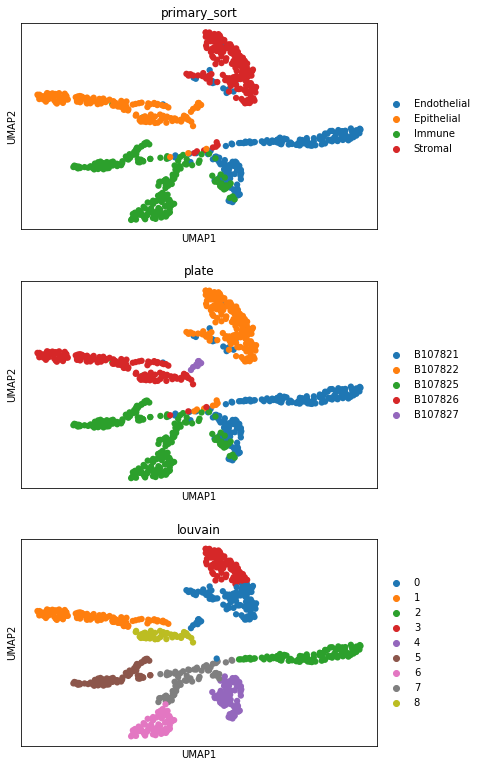

compute tissue rank genes
          0        1       2         3        4        5        6       7  \
0     CALD1  TACSTD2   S1PR1       C1R     SSR4   TPSAB1   FCGR2A     TTN   
1  CRISPLD2    KRT19   GNG11     FBLN1     MZB1    TPSB2     AIF1   MUC19   
2       MGP     KLF5  TM4SF1       C1S   FKBP11     CPA3     CYBB     FYB   
3      GPX3    CLDN4   ECSCR     MFAP4   SEC11C    TPSD1    ITGB2    SRGN   
4     MAP1B     KRT8  PCAT19  SERPING1     PIM2    HPGDS   TYROBP   CXCL8   
5     NUPR1     GPX2     VWF      MMP2  HSP90B1      KIT   MS4A6A   LRP1B   
6   RARRES2     AGR2   CCL14       CFD    DERL3    MS4A2    IFI30   MUC16   
7    LGALS1    KRT18   CLDN5       DCN    SPCS3  ARHGDIB  HLA-DRA  BCL2A1   
8       DCN    CLDN1  IFITM3    COL1A2   SLAMF7    VWA5A    CSF1R   USH2A   
9     CALM2   SLC2A1  PECAM1      LRP1    ISG20     CD69   GPR183   DNAH7   

         8  
0  RNA18S5  
1  MIR6723  
2    S100P  
3   MALAT1  
4  RNA45S5  
5    RN7SK  
6     PSCA  
7     ELF3  
8    KRT1

In [58]:
adata_all_tissues = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered.h5ad')
for t in list(set(adata_all_tissues.obs['tissue'])):
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Now looking at ' +t+ '!!!')
    print(' ')
    
    adata = read_h5ad('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-'+t+'.h5ad')
    ercc_genes = adata.var_names[adata.var_names.str.startswith('ERCC-')]
    adata = adata[:,~adata.var_names.isin(ercc_genes)]
    
    print('make sure data is consistent...')
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    
    print('get global view of the tissue')
    adata.obs['n_counts'] = adata.X.sum(axis=1)
    
    sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.4, multi_panel=True)
    sc.pl.scatter(adata, x='n_counts', y='n_genes')
    
    print('repeat the basic pre-processing')
#     adata = adata[adata.obs['n_genes'] < 5000, :]
    adata = adata[adata.obs['n_counts'] > 500, :]
    
    sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
    sc.pp.log1p(adata)
    
    adata.raw = adata
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.scale(adata, max_value=10)
    
    print('PCA')
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_overview(adata)
    
    print('neighbors')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)
    
    print('visualizations')
    sc.tl.umap(adata)
    sc.tl.tsne(adata)
    
    print('doing Louvain clustering for quick overview but likely to change this into Leiden')
    sc.tl.louvain(adata,resolution=.5)
    
    print('plot')
    sc.pl.tsne(adata, color=['primary_sort','plate','louvain'],cmap='Oranges',ncols=1)
    sc.pl.umap(adata, color=['primary_sort','plate','louvain'],cmap='Oranges',ncols=1)
    
    print('compute tissue rank genes')
    sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon')
    tiss_rank_genes = pd.DataFrame(adata.uns['rank_genes_groups']['names'])
    tiss_rank_genes.to_csv('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-'+t+'-rank-genes.csv')
    
    result = adata.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    tiss_rank_genes_score = pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores','pvals']})
    tiss_rank_genes_score.to_csv('/maca-bulk/sapiens/tabula-sapiens-facs-pilot-filtered-'+t+'-rank-genes-score.csv')
    print(tiss_rank_genes.head(10))




In [61]:
adata

AnnData object with n_obs × n_vars = 4084 × 24697 
    obs: 'plate', 'well', 'tissue', 'primary_sort', 'anatomical_position', 'sort_order', 'well_group', 'excluded', 'sort_direction', 'investigator', 'barcode', 'cDNA_prep_person', 'cDNA_dilute', 'library_prep', 'lib_prep_date', 'bead_cleanup', 'BA_nM', 'NovaSeqRun', 'additional_notes', 'n_genes'
    var: 'n_cells'

In [73]:
metadata = adata.obs

In [75]:
metadata.groupby(['tissue']).investigator.agg({'set':set})

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,set
tissue,
Bladder,{Beachy}
Blood,{Krasnow}
Lung,{Krasnow}
Muscle,{Rando}
PancreasEndocrine,{Kim}
PancreasExocrine,{Artandi}
